<a href="https://colab.research.google.com/github/mayankrohilla-tech/Transport-Safety/blob/main/Transport_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load and read data
data  = pd.read_csv('/content/drive/MyDrive/Project Data Scientist/Transport_Safety/Accident_Information.csv.csv', nrows=297000)
data.shape

(297000, 34)

In [3]:
data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30,21:13,Urban,Fine no high winds,2005,No


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident_Index,297000,297000,200632C127506,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st_Road_Class,297000,6,A,134409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st_Road_Number,296998.0,NaN,NaN,NaN,1003.344652,1849.410606,0.0,0.0,96.0,663.0,9999.0
2nd_Road_Class,177556,6,Unclassified,118924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd_Road_Number,294342.0,NaN,NaN,NaN,373.073299,1281.57619,0.0,0.0,0.0,0.0,9999.0
Accident_Severity,297000,3,Slight,254683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carriageway_Hazards,5506,6,Other object on road,2697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,297000,730,2005-10-21,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_Week,297000,7,Friday,49416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did_Police_Officer_Attend_Scene_of_Accident,296778.0,NaN,NaN,NaN,1.202956,0.412083,1.0,1.0,1.0,1.0,3.0


In [5]:
data.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

In [6]:
data.dtypes

,0
Accident_Index,object
1st_Road_Class,object
1st_Road_Number,float64
2nd_Road_Class,object
2nd_Road_Number,float64
Accident_Severity,object
Carriageway_Hazards,object
Date,object
Day_of_Week,object
Did_Police_Officer_Attend_Scene_of_Accident,float64


In [7]:
data['Accident_Severity'].value_counts()

,count
Accident_Severity,
Slight,254683
Serious,38089
Fatal,4228


In [8]:
data['Road_Type'].value_counts()

,count
Road_Type,
Single carriageway,222162
Dual carriageway,44781
Roundabout,18453
One way street,6653
Slip road,2930
Unknown,2021


In [9]:
data['Light_Conditions'].value_counts()

,count
Light_Conditions,
Daylight,215205
Darkness - lights lit,63051
Darkness - no lighting,15428
Darkness - lighting unknown,2021
Darkness - lights unlit,1295


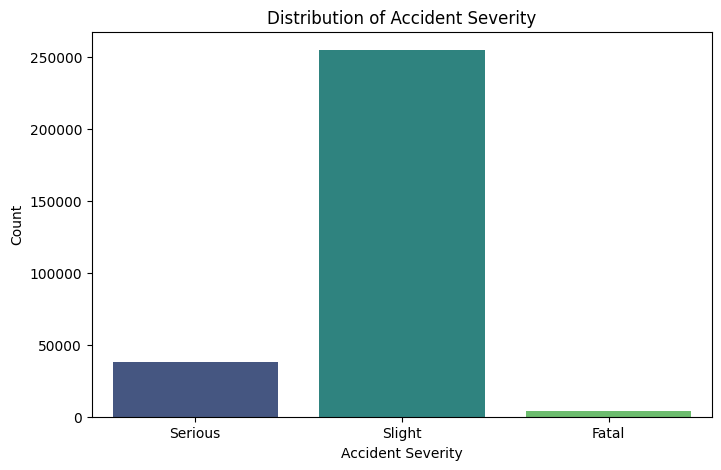

In [10]:
# visualisations of Accident_Severity
plt.figure(figsize=(8,5))
sns.countplot(x='Accident_Severity', data = data, palette = 'viridis')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.show()

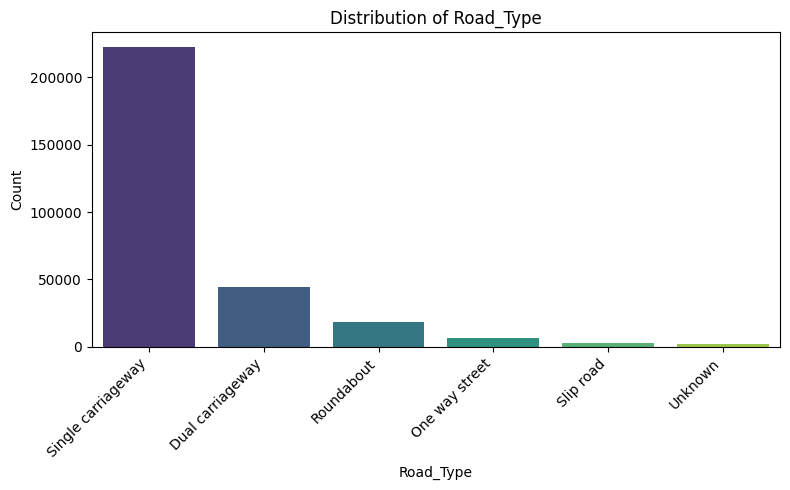

In [11]:
# visualisations of Road_Type
plt.figure(figsize=(8,5))
sns.countplot(x='Road_Type', data = data, palette = 'viridis', order=data['Road_Type'].value_counts().index)
plt.xlabel('Road_Type')
plt.ylabel('Count')
plt.title('Distribution of Road_Type')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [12]:
weather_counts = data['Weather_Conditions'].value_counts()
weather_counts

,count
Weather_Conditions,
Fine no high winds,239033
Raining no high winds,34644
Other,7067
Unknown,5235
Fine + high winds,3658
Raining + high winds,3281
Snowing no high winds,2019
Fog or mist,1735
Snowing + high winds,327


(np.float64(-1.0999999995863445),
 np.float64(1.0999999955141144),
 np.float64(-1.099999998539185),
 np.float64(1.0999999999304375))

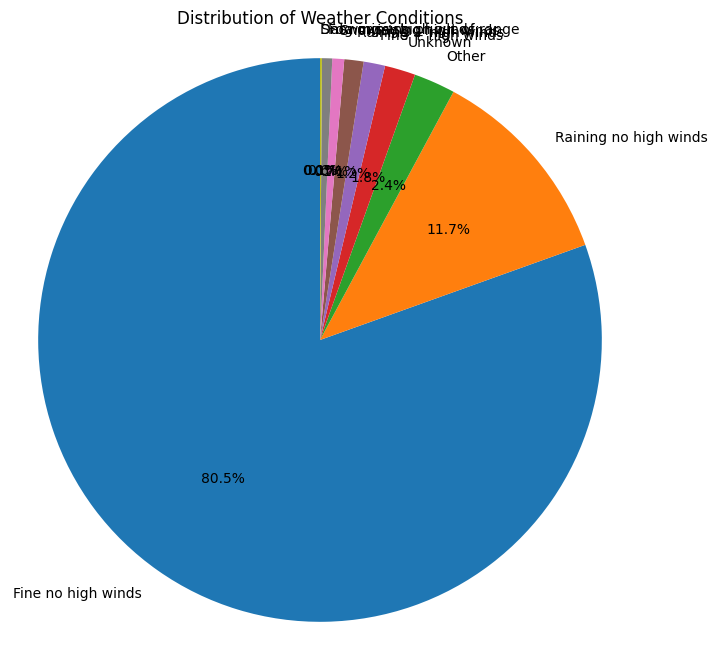

In [13]:
# Pie chart for looking at the distribution of weather conditions

weather_counts = data['Weather_Conditions'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Conditions')
plt.axis('equal')

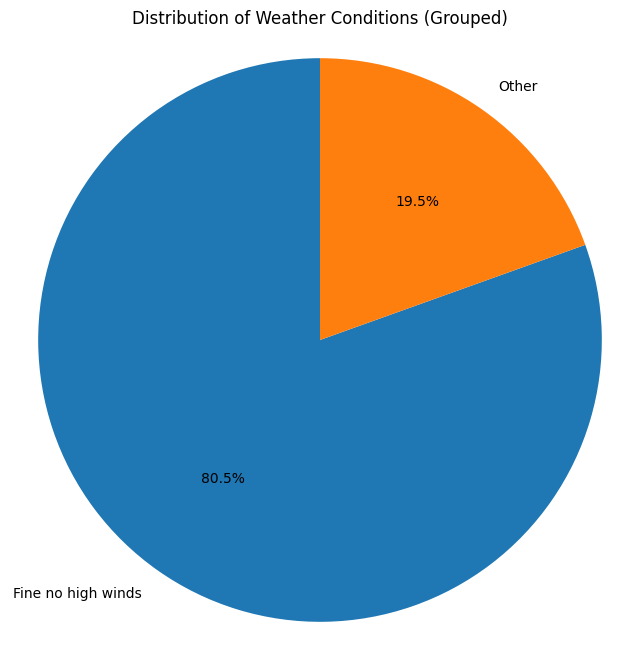

In [14]:
# Pie chart for looking at the distribution of weather conditions

# Group less frequent weather conditions into 'Other'
threshold = 50000
weather_counts = data['Weather_Conditions'].value_counts()
other_weather = weather_counts[weather_counts < threshold].index
data['Weather_Conditions_Grouped'] = data['Weather_Conditions'].replace(other_weather, 'Other')

weather_counts_grouped = data['Weather_Conditions_Grouped'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(weather_counts_grouped, labels=weather_counts_grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Conditions (Grouped)')
plt.axis('equal')
plt.show()

['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland']


       ## Column that effect Accident Can Happen or not


1.   Speed_limit
2.   Weather_Conditions
3.   Number_of_Vehicles
4.   Special_Conditions_at_Site
5.   Road_Surface_Conditions
6.   Road_Type
7.   Light_Conditions
8.   Day_of_Week
9.   Time
10.  Carriageway_Hazards


    

In [15]:
# Determine the lighting factor as a cause of accident.

In [16]:
# Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

In [17]:
# include all columns
data_subset = data.copy()

In [18]:
# Label encode categorical features to numerical values
for col in data_subset.columns:
  if data_subset[col].dtype == 'object':
    data_subset[col] = data_subset[col].astype('category').cat.codes

In [19]:
# Correlation

corr_matrix = data_subset.corr()
corr_matrix['Accident_Severity'].sort_values(ascending=False)

,Accident_Severity
Accident_Severity,1.000000
Did_Police_Officer_Attend_Scene_of_Accident,0.127561
Urban_or_Rural_Area,0.084072
Number_of_Vehicles,0.080120
2nd_Road_Class,0.057695
Light_Conditions,0.044462
2nd_Road_Number,0.031374
Weather_Conditions,0.031010
Junction_Detail,0.029034
Weather_Conditions_Grouped,0.026781


In [20]:
# Random Forest Feature Importance
x_temp = data_subset.drop('Accident_Severity', axis=1)
y_temp = data_subset['Accident_Severity']

rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(x_temp, y_temp)

RandomForestClassifier(random_state=42)

In [21]:
rf_importances = pd.Series(rf_temp.feature_importances_, index=x_temp.columns)
rf_importances.sort_values(ascending=False)

,0
Time,0.083191
Accident_Index,0.080874
Date,0.075812
Latitude,0.074274
Longitude,0.073694
Location_Northing_OSGR,0.073539
Location_Easting_OSGR,0.073380
LSOA_of_Accident_Location,0.067512
1st_Road_Number,0.049672
Local_Authority_(District),0.039969


In [22]:
# Mutual Information
# Handling missing value by filling with the mean
x_temp_filled = x_temp.fillna(x_temp.mean())
mi_scores = mutual_info_classif(x_temp_filled, y_temp, random_state=14)
mi_scores = pd.Series(mi_scores, index=x_temp.columns)
mi_scores.sort_values(ascending=False)

,0
Carriageway_Hazards,0.060707
Urban_or_Rural_Area,0.052491
Did_Police_Officer_Attend_Scene_of_Accident,0.045206
Year,0.039551
Road_Type,0.039098
Light_Conditions,0.034953
Number_of_Vehicles,0.033176
Speed_limit,0.033140
Number_of_Casualties,0.033092
Special_Conditions_at_Site,0.032125


In [23]:
# Combine feature selection
selected_features = list(set(
    rf_importances[rf_importances > 0.01].index.tolist() +
    mi_scores[mi_scores > 0.01].index.tolist()))

In [24]:
print("\nSelected Features: ", selected_features)


Selected Features:  ['1st_Road_Class', 'Location_Easting_OSGR', 'Light_Conditions', 'Road_Type', 'Local_Authority_(District)', 'Longitude', 'Date', 'Year', 'Junction_Detail', 'Special_Conditions_at_Site', 'Number_of_Vehicles', 'Time', 'Local_Authority_(Highway)', 'Police_Force', 'LSOA_of_Accident_Location', '2nd_Road_Class', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Location_Northing_OSGR', 'Speed_limit', '2nd_Road_Number', 'Carriageway_Hazards', '1st_Road_Number', 'Weather_Conditions', 'Accident_Index', 'Day_of_Week', 'Road_Surface_Conditions', 'Number_of_Casualties', 'Pedestrian_Crossing-Physical_Facilities', 'Urban_or_Rural_Area', 'Junction_Control']


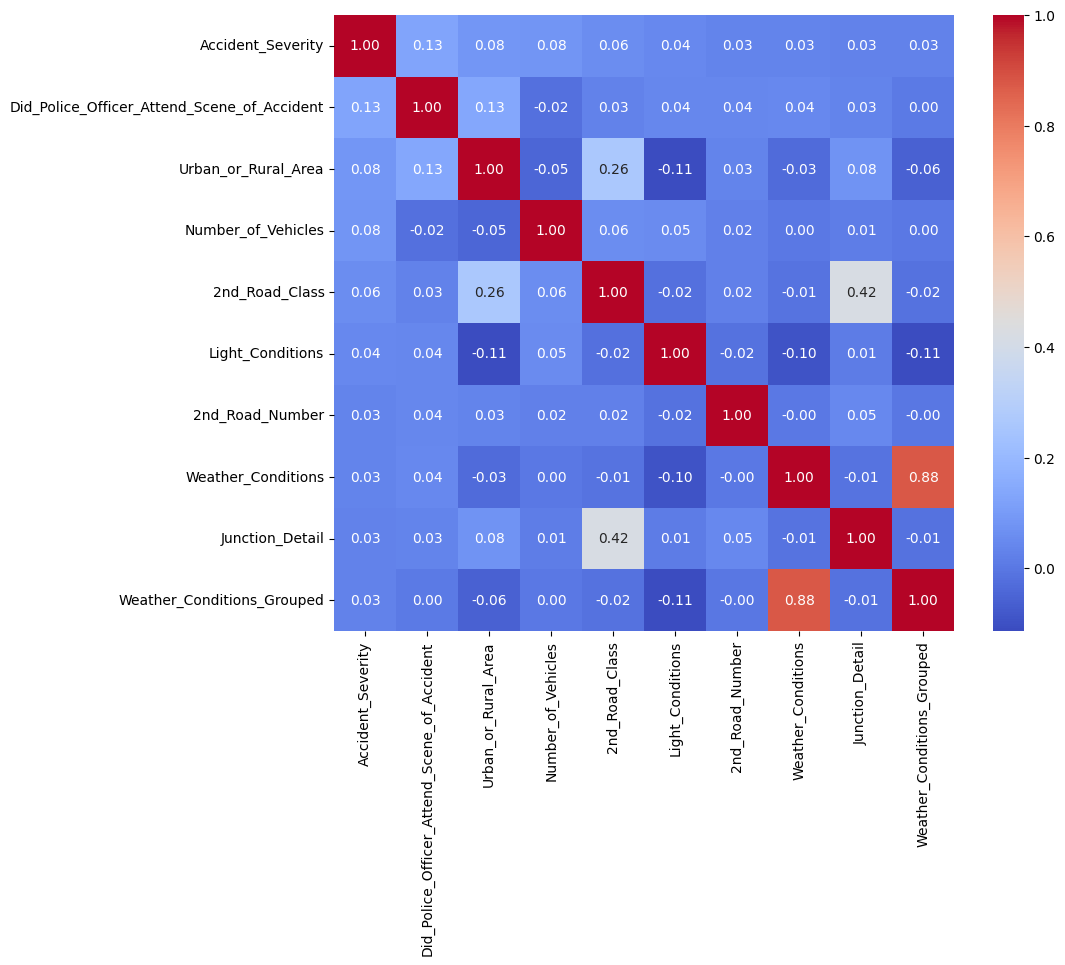

In [25]:
# Uncluttered Heatmap of Correlation Matrix

top_n = 10

top_features = corr_matrix['Accident_Severity'].sort_values(ascending=False).head(top_n).index.tolist()

# if 'Accient_Severity' not in top_features:
#     top_features.append('Accident_Severity')

plt.figure(figsize=(10, 8))
sns.heatmap(data_subset[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [26]:
#Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [27]:
data_subset['Accident_Severity'].value_counts()

,count
Accident_Severity,
2,254683
1,38089
0,4228


In [28]:
#Apply SMOTE
X = data_subset.drop('Accident_Severity', axis=1)
y = data_subset['Accident_Severity']

# Handle missing values by filling with the mean
X_filled = X.fillna(X.mean())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_filled, y)

In [29]:
# SPlit data

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
# Train the model

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [31]:
#Evaluate Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9346050651135397

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     50965
           1       0.94      0.87      0.90     50896
           2       0.88      0.94      0.91     50949

    accuracy                           0.93    152810
   macro avg       0.94      0.93      0.93    152810
weighted avg       0.94      0.93      0.93    152810



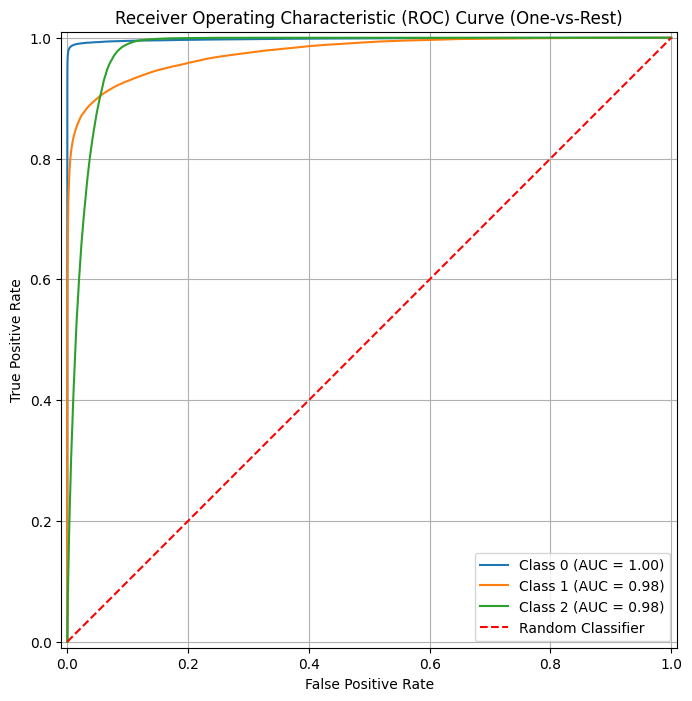

In [37]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay


# Get the number of classes from y_test
n_classes = len(y_test.unique())

# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Plot ROC curve for each class (One-vs-Rest)
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Binarize y_test for the current class (one-vs-rest)
    y_test_binarized = (y_test == i).astype(int)
    RocCurveDisplay.from_predictions(y_test_binarized, y_pred_proba[:, i], name=f'Class {i}', ax=plt.gca())
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
plt.legend()
plt.grid(True)
plt.show()

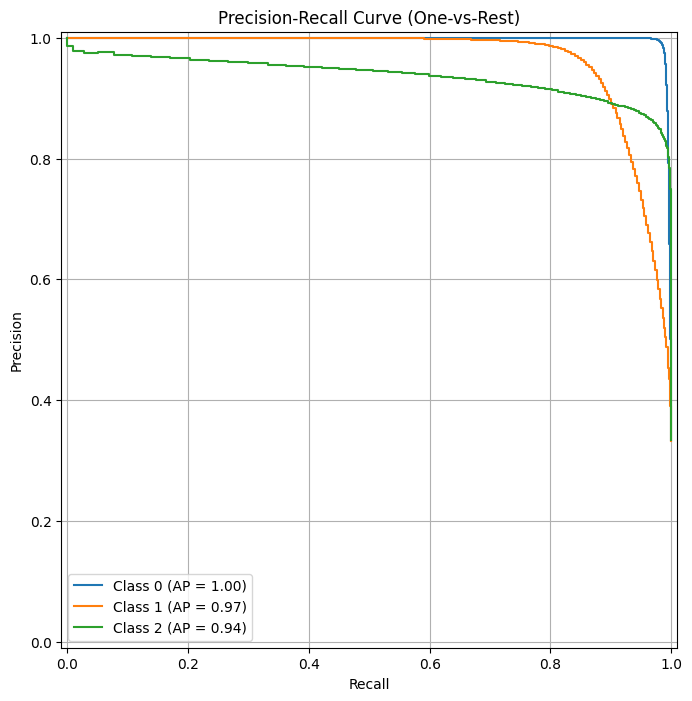

In [40]:
# Plot Precision-Recall curve for each class (One-vs-Rest)
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Binarize y_test for the current class (one-vs-rest)
    y_test_binarized = (y_test == i).astype(int)
    PrecisionRecallDisplay.from_predictions(y_test_binarized, y_pred_proba[:, i], name=f'Class {i}', ax=plt.gca())
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

## Analysis Summary

1.  **Data Loading & Initial Exploration**: We loaded the `Accident_Information.csv.csv` dataset and performed initial checks using `head()`, `describe()`, `dtypes`, and `value_counts()` for various columns to understand its structure and content.

2.  **Feature Engineering & Preprocessing**: We created a `Weather_Conditions_Grouped` column by grouping less frequent weather conditions into 'Other'. Categorical features were label encoded to numerical values, and missing values in numerical features were handled by imputation.

3.  **Feature Selection**: We employed a multi-faceted approach to feature selection:
    *   **Correlation Analysis**: Examined correlations with `Accident_Severity`.
    *   **Random Forest Feature Importance**: Identified features with high importance from a Random Forest model.
    *   **Mutual Information**: Measured the dependency between features and the target variable.
    These methods helped us understand which features are most relevant to predicting accident severity.

4.  **Addressing Class Imbalance**: The `Accident_Severity` target variable was imbalanced (mostly 'Slight' accidents). To counteract this, we applied **SMOTE (Synthetic Minority Over-sampling Technique)** to the training data, creating synthetic samples for minority classes ('Fatal' and 'Serious') to balance the dataset.

5.  **Model Training**: We split the resampled data into training and testing sets and trained a `RandomForestClassifier` model on the balanced training data.

6.  **Model Evaluation**: The model achieved an **accuracy of approximately 93.46%** on the test set. The **Classification Report** showed strong precision, recall, and F1-scores across all three classes, indicating good performance in predicting 'Slight', 'Serious', and 'Fatal' accidents.

7.  **ROC and Precision-Recall Curves**: We visualized the model's performance using:
    *   **Receiver Operating Characteristic (ROC) curves**: These showed that the model performs significantly better than a random classifier for all classes, with high AUC values, indicating strong discriminative power.
    *   **Precision-Recall curves**: These curves illustrated the trade-off between precision and recall for each class, demonstrating that the model maintains good precision even at higher recall levels, which is crucial for identifying severe accidents.

In conclusion, the RandomForestClassifier, trained on a balanced dataset with carefully selected features, shows robust performance in classifying accident severity levels.